In [2]:
library(ggplot2)
library(tidyverse)
library(magrittr)
library(igraph)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.2.0     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
✔ purrr   1.0.1     

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is mas

In [4]:
df_sw <- read.csv("small//sm_1000n_10nei_nei2np_40means.csv")

# plot_sw <- ggplot(df_sw, aes(x = alpha,
#                             y = g_ratio)) +
# geom_point(aes(col = type,
#                ),
#            size = 4) +
# geom_line(aes(col = type,
#               ),
#           linewidth = 0.7,
#           linetype=5) +
# geom_linerange(aes(x = alpha,
#                    ymin = g_ratio - g_ratio_sd,
#                    ymax = g_ratio + g_ratio_sd,
#                    col = type),
#                position = position_dodge(0.005)) +
# ylim(0, 1) +
# # xlim(0, 0.2) +
# labs(x = expression(paste("Parameter ", alpha)),
#      y = "G ratio",
#      col = "Attack protocol",
#      shape='Wiring probablity',
#      title = expression(paste("Small-world model"))) +
# theme_bw() +
# theme(text = element_text(size = 20))

# plot_sw
# ggsave(plot = plot_sw, filename = "sw_1000n_10nei_nei2np_40means.pdf", width = 10,
#     height = 7, scale = 0.75)

In [7]:
df_sw_2 <- read.csv("small/sm_1000n_5nei_nei2np_40means.csv")

In [12]:
df_sw['nei']<-'5/n'
df_sw_2['nei']<-'2/n'

df_sw_all<-rbind(df_sw, df_sw_2)

Warning message in geom_line(aes(col = type, shape = nei), linewidth = 0.7, linetype = 5):
“Ignoring unknown aesthetics: shape”
Warning message:
“Removed 33 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 33 rows containing missing values (`geom_segment()`).”


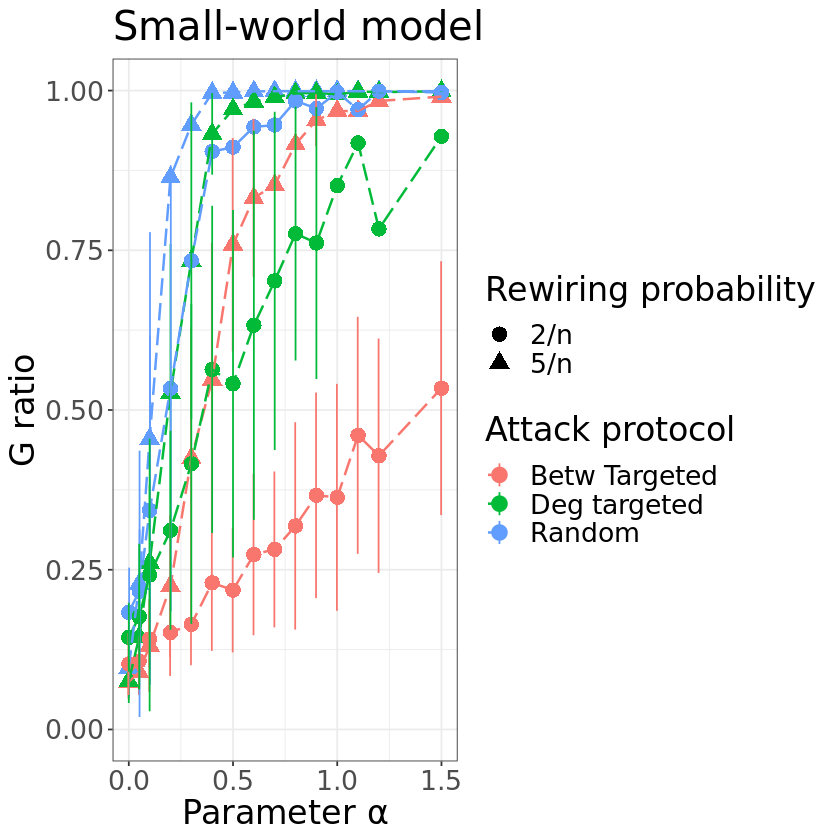

In [17]:
plot_all<-ggplot(df_sw_all, aes(x = alpha,
                            y = g_ratio)) +
geom_point(aes(col = type,
               shape=nei),
           size = 4) +
geom_line(aes(col = type,
              shape=nei),
          linewidth = 0.7,
          linetype=5) +
geom_linerange(aes(x = alpha,
                   ymin = g_ratio - g_ratio_sd,
                   ymax = g_ratio + g_ratio_sd,
                   col = type),
               position = position_dodge(0.005)) +
ylim(0, 1) +
# xlim(0, 0.2) +
labs(x = expression(paste("Parameter ", alpha)),
     y = "G ratio",
     col = "Attack protocol",
     shape='Rewiring probability',
     title = expression(paste("Small-world model"))) +
theme_bw() +
theme(text = element_text(size = 20))

plot_all

ggsave(plot = plot_all, filename = "sw_1000n_40means.pdf", width = 10,
    height = 7, scale = 0.75)

Warning message:
“Removed 19 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 19 rows containing missing values (`geom_segment()`).”


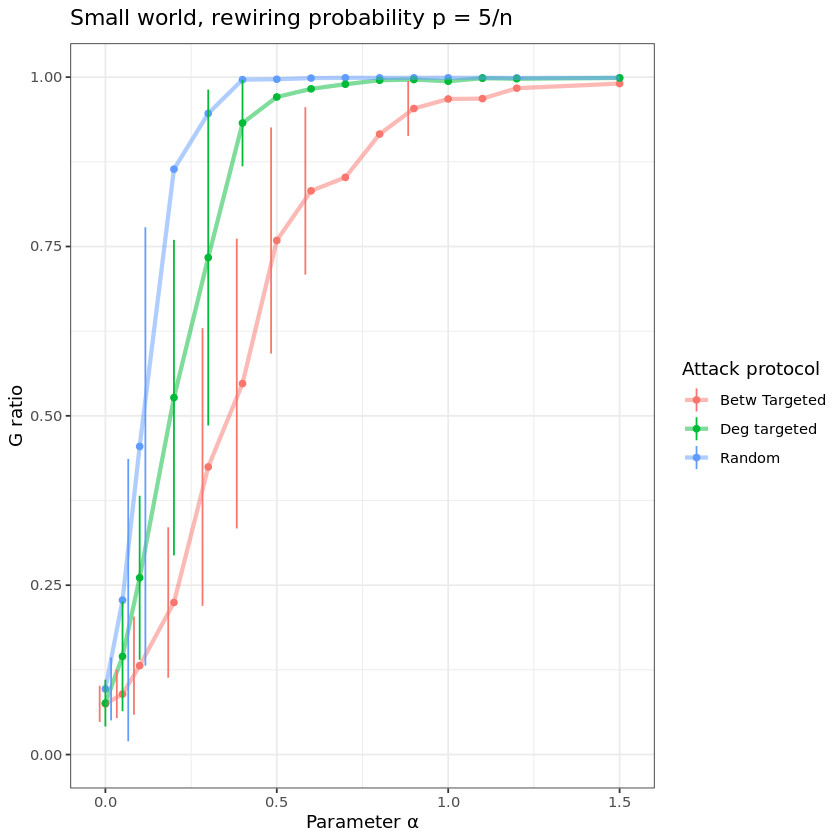

In [30]:
plot_sw_2 <- ggplot(df_sw, aes(x = alpha, y = g_ratio, col = type)) + geom_point() +
    geom_line(alpha = 0.5, linewidth = 1.2) + geom_linerange(aes(x = alpha, ymin = g_ratio -
    g_ratio_sd, ymax = g_ratio + g_ratio_sd, col = type), position = position_dodge(0.05)) +
    ylim(0, 1) + labs(x = expression(paste("Parameter ", alpha)), y = "G ratio",
    col = "Attack protocol", title = expression(paste("Small world, rewiring probability p = 5/n"))) +
    theme_bw()

plot_sw_2
ggsave(plot = plot_sw, filename = "sw_1000n_5nei_nei2np_40means.pdf", width = 10,
    height = 7, scale = 0.75)

# analysis on the kind of network

In [10]:
n <- 1000
k_min <- 2
k_max <- n
gamma <- 2.8
weights <- (k_min:k_max)^(-gamma)

In [11]:
degseq <- function(n, k_min, k_max, weights) {
    degs <- sample(c(k_min:k_max), size = n, replace = TRUE, prob = weights)
    if (sum(degs) %% 2 == 1) {
        degs[1] <- degs[1] + 1
    }
    g <- igraph::sample_degseq(out.deg = degs, method = "vl")
    return(g)
}

In [12]:
g<-degseq(n, k_min, k_max , weights )

In [13]:
deg_graph<-degree(g)
fit_res<-fit_power_law(deg_graph, xmin = 1)
f <- function(g, x) {
    function(x) {
        x^-g
    }
}
f2<-f(2)
f3<-f(3)
f_c<-f(fit_res$alpha)
deg_dist<-degree_distribution(g)

In [14]:
pdf("conf_28gamma_2kmin_1000n.pdf",width=14, height = 10) 
# par(cex.lab = 1.5, cex.axis = 1.5)
layout.matrix <- matrix(c(1, 1, 1, 1, 2, 0), nrow = 2, ncol = 3)
lay_plots <- layout(mat = layout.matrix)

x_min <- 1
x_max <- 100
# options(repr.plot.width = 14, repr.plot.height = 7)
par(cex.axis = 2.5, cex.lab = 2.5, cex.main = 1, oma=c(2,2,2,2), mar=c(6,6,4,4))
plot(1:19, deg_dist[2:20], xlab = "Degree k", ylab = "Prob(k)", pch = 16, cex = 2.3,
    xlim = c(1, 30), log = "xy")
curve(f_c, from = x_min, to = x_max, add = T, log = "xy", col = "red", lwd = 3)
curve(f2, from = x_min, to = x_max, add = T, log = "xy", col = "blue", lwd = 3)
curve(f3, from = x_min, to = x_max, add = T, log = "xy", col = "darkgreen", lwd = 3)
grid()
legend("bottomleft", legend = c(paste("Fit pwr law:", round(fit_res$alpha,2)), "gamma=2", "gamma=3"), col = c("red",
    "blue", "darkgreen"), lty = 1, lwd = 3, cex = 3, title = 'loglog plot')

plot(deg_dist, xlab = "Degree k", ylab = "log(prob(k))", pch = 16,
    cex = 1.3, xlim = c(1, 22))
lines(deg_dist)
# abline(a = linear_model$coefficients[[1]], b = linear_model$coefficients[[2]])
grid()
legend('topright', legend=c('Dist of k'), lwd=2, lty=1, cex=2)
dev.off()

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“3 y values <= 0 omitted from logarithmic plot”


png 
  2

In [15]:
V(g)$cst_ids<-1:length(g)
V(g)$load <- betweenness(g, v = V(g), directed = FALSE)
V(g)$capacity <- (1 + 1.5) * V(g)$load
overloaded <- sample(order(V(g)$load, decreasing = TRUE)[1:3])

dead_nodes <- overloaded
g_or <- g

while (length(overloaded) > 0) {
    g_or <- delete_vertices(g_or, overloaded)
    V(g_or)$load <- betweenness(g_or, v = V(g_or), directed = FALSE)
    overloaded <- as.vector(V(g_or)[load > capacity])
    orig_idx <- V(g_or)[overloaded]$cst_ids
    dead_nodes <- c(dead_nodes, orig_idx)
}


n_prime <- max(components(g_or)$csize)
n_orig <- max(components(g)$csize)

In [16]:
n_orig

[1] 1000

In [17]:
colors<-rep('#0000FF', max(components(g)$csize))

In [18]:
lcc_survived<-V(g_or)$cst_ids[components(g_or)$membership==which.max(components(g_or)$csize)]

In [19]:
colors[lcc_survived]<-'#FF0000'

In [20]:
lay<-layout_with_fr(g)

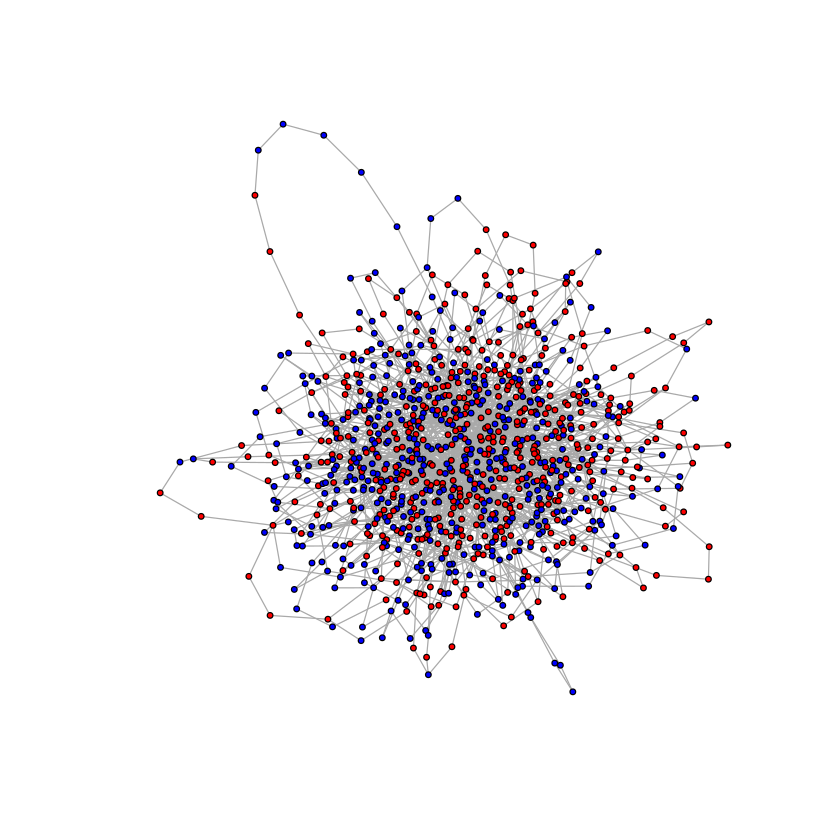

In [21]:
plot(g, vertex.size=2, vertex.label=NA, layout=lay, vertex.color=colors)

In [22]:
g<-subgraph(g,lcc_survived )

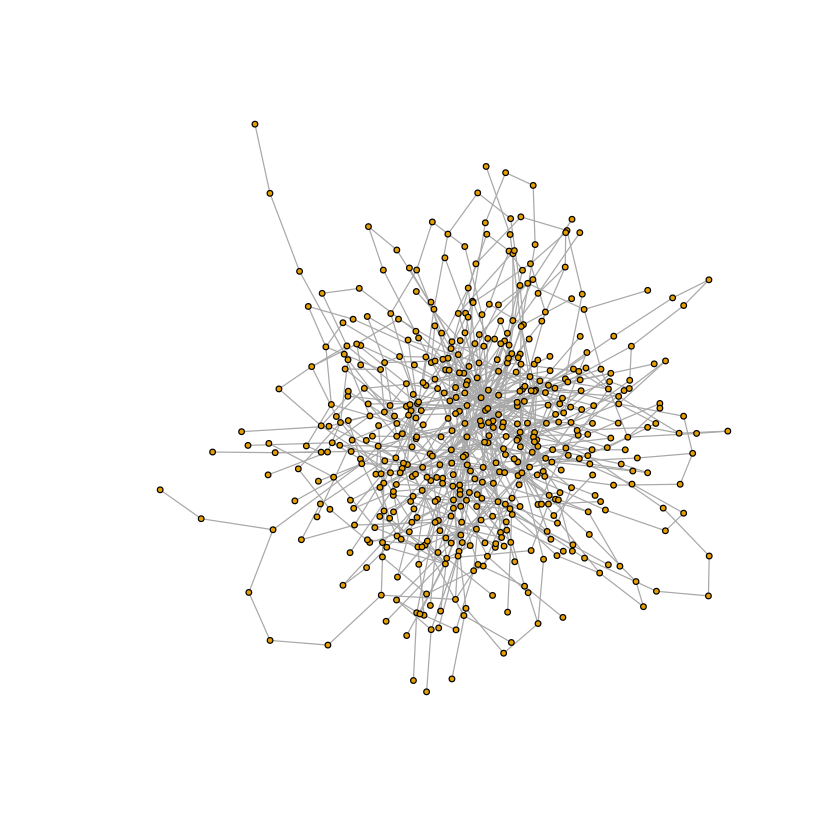

In [23]:
plot(g, vertex.size=2, vertex.label=NA, layout=lay[lcc_survived,])

In [24]:
mean(degree(g))

[1] 2.728324